In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import skimage as ski
import matplotlib as mat
import PIL

Carregando bounding boxes (fonte: https://christianjmills.com/posts/torchvision-cvat-annotation-tutorials/bounding-boxes/)

In [15]:
import xml.etree.ElementTree as ET
import pandas as pd

def parse_cvat_bbox_xml(xml_content):

    # Parse the XML content
    root = ET.fromstring(xml_content)
    data = {}

    # Iterate through each image element in the XML
    for image in root.findall('image'):
        # Extract image attributes
        image_id = image.get('id')
        image_name = image.get('name')
        width = image.get('width')
        height = image.get('height')

        # Initialize a dictionary to store image data
        image_data = {
            'Image ID': int(image_id),
            'Image Name': image_name,
            'Width': int(width),
            'Height': int(height),
            'Boxes': []
        }

        # Iterate through each bounding box element within the image
        for box in image.findall('box'):
            # Extract box attributes
            label = box.get('label')
            xtl = float(box.get('xtl'))
            ytl = float(box.get('ytl'))
            xbr = float(box.get('xbr'))
            ybr = float(box.get('ybr'))

            # Construct a dictionary for the box data
            box_data = {
                'Label': label,
                'xtl': xtl,
                'ytl': ytl,
                'xbr': xbr,
                'ybr': ybr
            }

            # Append the box data to the image's 'Boxes' list
            image_data['Boxes'].append(box_data)

        # Map the image data to its ID in the data dictionary
        data[image_id] = image_data

    # Convert the data dictionary to a DataFrame and return
    return pd.DataFrame.from_dict(data, orient='index')

# Read the XML file
with open('./drive/MyDrive/PDI/bbox_orig_imgs_annotations.xml', 'r', encoding='utf-8') as file:
    xml_content = file.read()

# Parse the XML content
annotation_df = parse_cvat_bbox_xml(xml_content)



,Image ID,Image Name,Width,Height,Boxes
0,0,processed_images/capacitor/00-01-V1-B.png,1300,1500,"[{'Label': 'capacitor', 'xtl': 436.5, 'ytl': 5..."
1,1,processed_images/capacitor/00-01-V1-W.png,1300,1500,"[{'Label': 'capacitor', 'xtl': 382.84, 'ytl': ..."
2,2,processed_images/capacitor/00-01-V2-B.png,1300,1500,"[{'Label': 'capacitor', 'xtl': 74.9, 'ytl': 25..."
3,3,processed_images/capacitor/00-01-V2-W.png,1300,1500,"[{'Label': 'capacitor', 'xtl': 368.54, 'ytl': ..."
4,4,processed_images/capacitor/00-02-V1-B.png,1300,1500,"[{'Label': 'capacitor', 'xtl': 298.04, 'ytl': ..."


In [61]:
# Importar dados e salvar com bbox
imgs_bbox = {}
pontos_primeira_img_classes = []

for idx, row in annotation_df.iterrows():
  classe = row['Boxes'][0]['Label']
  if classe not in imgs_bbox:
    imgs_bbox[classe] = []

  img = ski.io.imread(f'./drive/MyDrive/PDI/{row["Image Name"]}')

  xtl = row['Boxes'][0]['xtl']
  ytl = row['Boxes'][0]['ytl']
  xbr = row['Boxes'][0]['xbr']
  ybr = row['Boxes'][0]['ybr']

  if int(idx) % 20 == 0:
    pontos_primeira_img_classes.append((ytl, xtl))

  rr, cc = ski.draw.rectangle_perimeter((ytl, xtl), end=(ybr, xbr), shape=img.shape)

  img[rr, cc] = (255, 0, 0)
  imgs_bbox[classe].append(img)

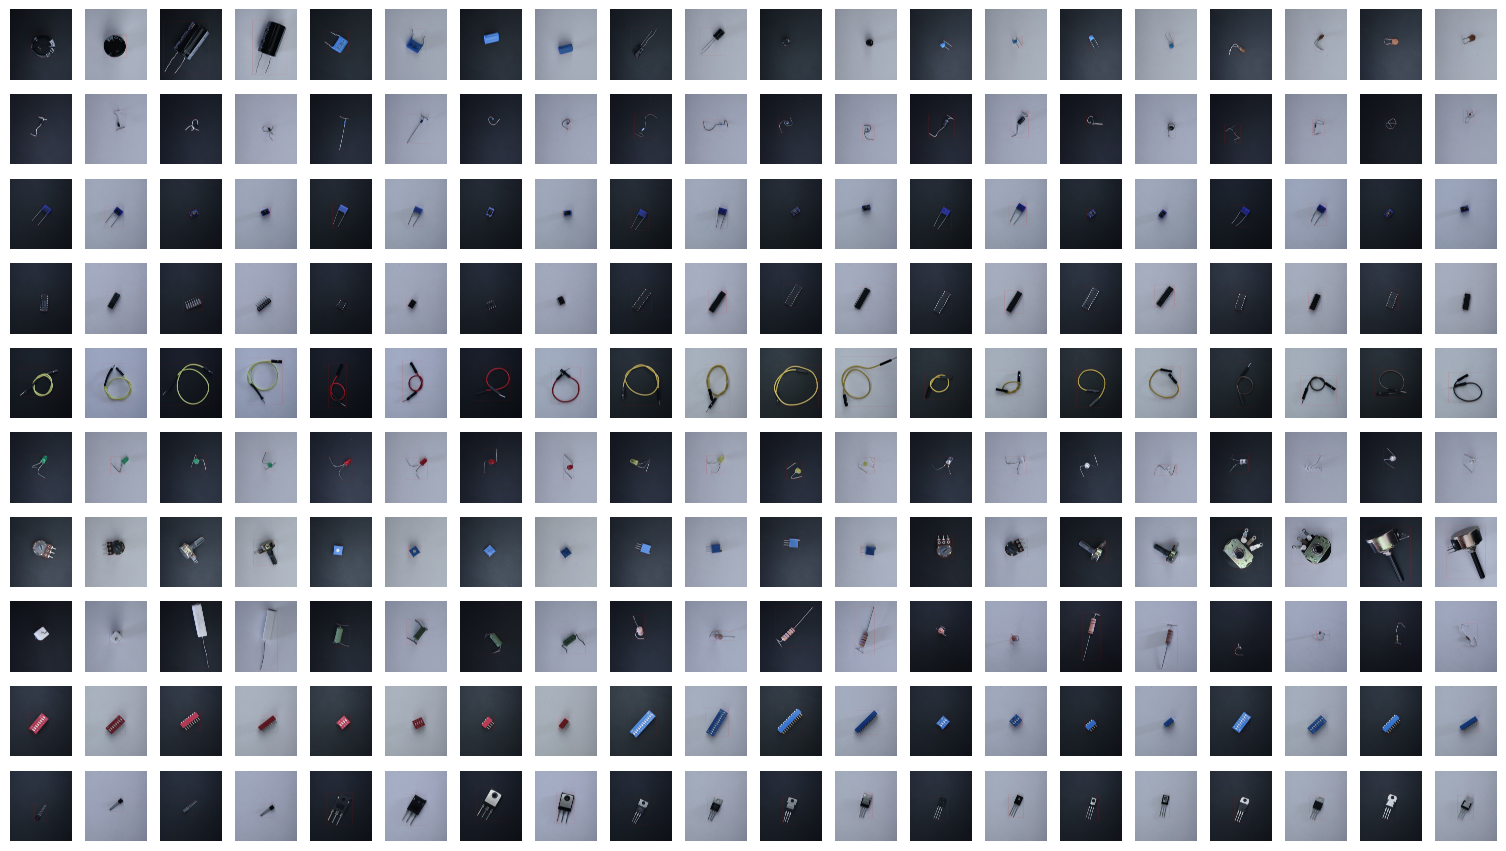

In [60]:
# Plotar todas as imagens com bounding-box

fig, ax = mat.pyplot.subplots(10, 20, figsize=(19.2, 10.8))
ax = ax.ravel()

for idx, row in annotation_df.iterrows():
  classe = row['Boxes'][0]['Label']
  xtl = row['Boxes'][0]['xtl']
  ytl = row['Boxes'][0]['ytl']
  xbr = row['Boxes'][0]['xbr']
  ybr = row['Boxes'][0]['ybr']


  text = row['Boxes'][0]['Label']

  ax[int(idx)].imshow(imgs_bbox[classe][int(idx) % 20])
  ax[int(idx)].set_axis_off()


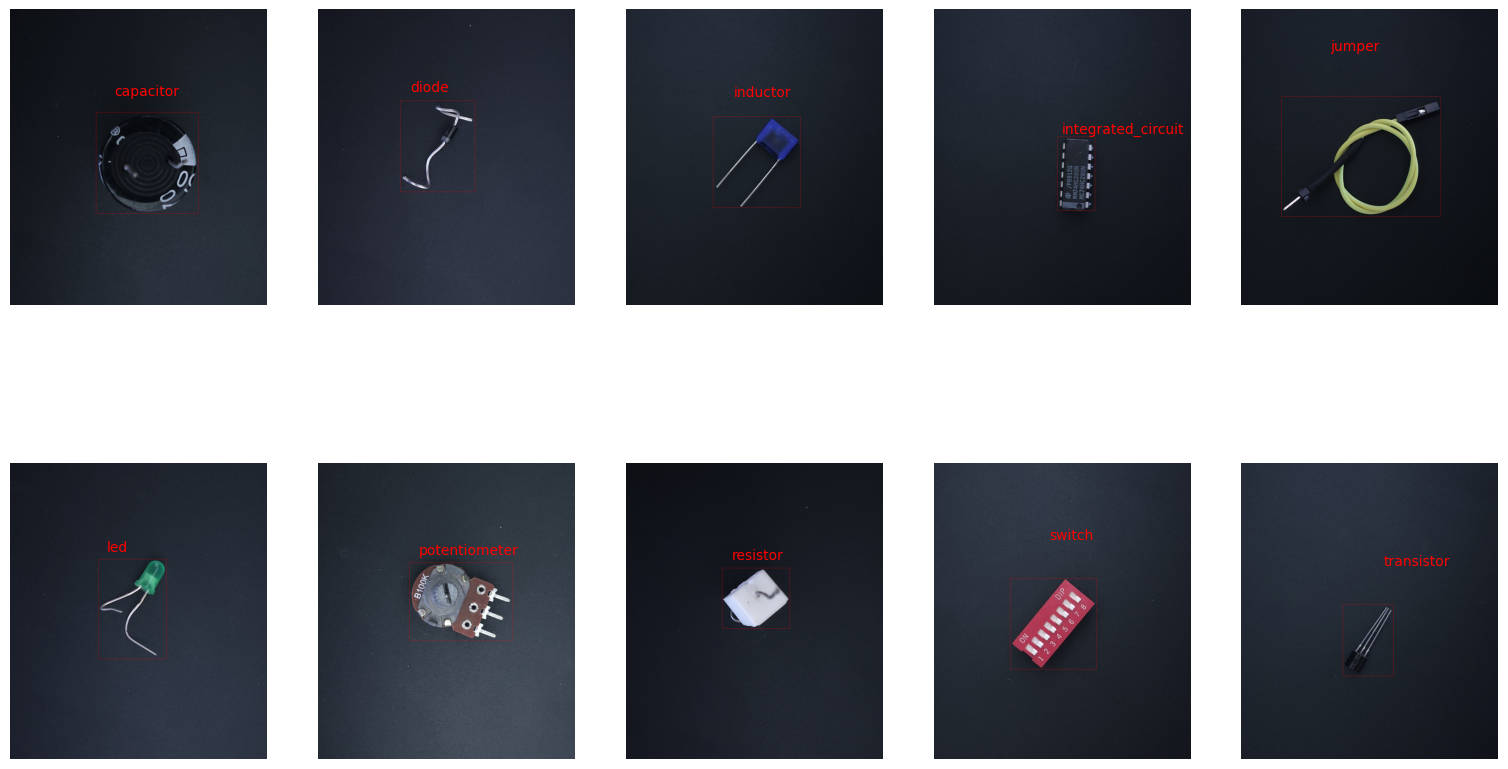

In [63]:
# Plotar um item de cada classe, com bbox
fig, ax = mat.pyplot.subplots(2, 5, figsize=(19.2, 10.8))
ax = ax.ravel()

for i, classe in enumerate(imgs_bbox.keys()):
  ax[i].imshow(imgs_bbox[classe][0])
  ax[i].text(pontos_primeira_img_classes[i][0],
             pontos_primeira_img_classes[i][1], classe, color='r')
  ax[i].set_axis_off()
